In [ ]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as st
import statsmodels.api as sm
from scipy import stats
from datetime import datetime, date, time
import random

In [432]:
## function for transormation stock prices to stock returns.
def stock_return(stock):
    df_stock_return=pd.read_csv(stock)
    df_stock_return['xlag']=df_stock_return['Adj Close'].shift(1)
    df_stock_return['Daily_return']=(df_stock_return['Adj Close']/df_stock_return['xlag'])-1
    df_stock_return['Daily_return_lag']=df_stock_return['Daily_return'].shift(1)
    df_stock_return.drop(df_stock_return.head(2).index,inplace=True)
    return df_stock_return

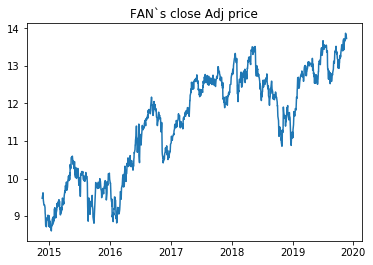

In [455]:
Stock_FAN=pd.read_csv('FAN.csv')
Stock_FAN['Date']=pd.to_datetime(Stock_FAN['Date'])
plt.plot(Stock_FAN['Date'],Stock_FAN['Adj Close'])
plt.title('FAN`s close Adj price')
plt.savefig('FAN`s.jpg')
plt.show()

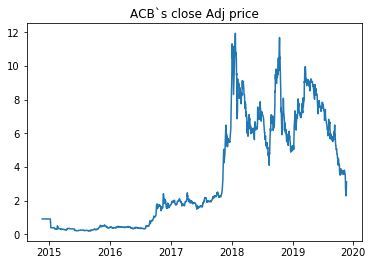

In [454]:
Stock_ACB['Date']=pd.to_datetime(Stock_ACB['Date'])
plt.plot(Stock_ACB['Date'],Stock_ACB['Adj Close'])
plt.title('ACB`s close Adj price')
plt.savefig('ACB.jpg')
plt.show()

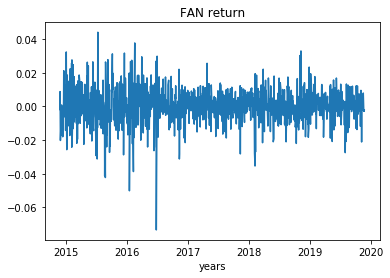

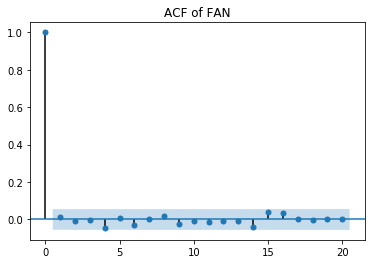

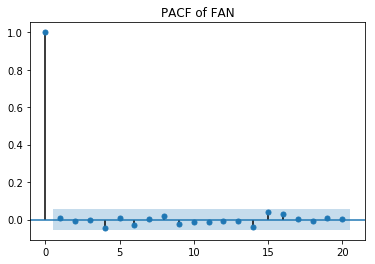

In [520]:
##Plots of return, ACF, PACF of FAN
Stock1=stock_return('FAN.csv')
Stock1['Date']=pd.to_datetime(Stock1['Date'])
plt.plot(Stock1['Date'],Stock1['Daily_return'])
plt.title('FAN return')
plt.xlabel('years')
plt.savefig('plot3.jpg')
plot_acf(Stock1['Daily_return'], lags=20)
plt.title('ACF of FAN')
plt.savefig('ACF of FAN.jpg')
plot_pacf(Stock1['Daily_return'], lags=20)
plt.title('PACF of FAN')
plt.savefig('PACF of FAN.jpg')
plt.show()

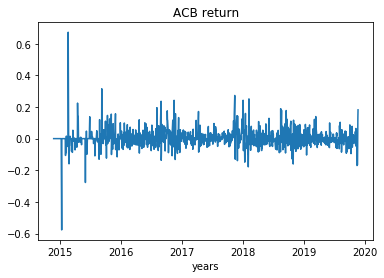

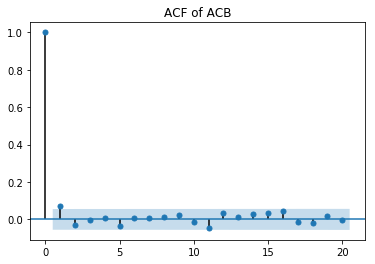

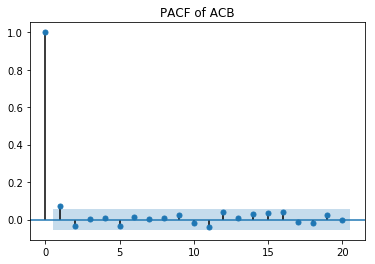

In [529]:
##Plots of return, ACF, PACF of ACB
Stock2=stock_return('ACB.csv')
Stock2['Date']=pd.to_datetime(Stock2['Date'])
plt.plot(Stock2['Date'],Stock2['Daily_return'])
plt.title('ACB return')
plt.xlabel('years')
plt.savefig('plot4.jpg')
plot_acf(Stock2['Daily_return'], lags=20)
plt.title('ACF of ACB')
plt.savefig('ACF of ACB.jpg')
plot_pacf(Stock2['Daily_return'], lags=20)
plt.title('PACF of ACB')
plt.savefig('PACF of ACB.jpg')
plt.show()

In [395]:
##Estimate AR(1) model using sm ols
Stock1['const']=1
y1=Stock1['Daily_return']
X1=Stock1[['Daily_return_lag','const']]
model1=sm.OLS(y1,X1,missing='drop')
resultsAR1_stock1=model1.fit()
print(resultsAR1_stock1.summary())

                            OLS Regression Results                            
Dep. Variable:           Daily_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2015
Date:                Sun, 24 Nov 2019   Prob (F-statistic):              0.654
Time:                        18:47:58   Log-Likelihood:                 3961.2
No. Observations:                1257   AIC:                            -7918.
Df Residuals:                    1255   BIC:                            -7908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Daily_return_lag     0.0127      0.028  

In [452]:
Stock2['const']=1
y1=Stock2['Daily_return']
X1=Stock2[['Daily_return_lag','const']]
model1=sm.OLS(y1,X1,missing='drop')
resultsAR1_stock1=model1.fit()
print(resultsAR1_stock1.summary())

                            OLS Regression Results                            
Dep. Variable:           Daily_return   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     6.812
Date:                Tue, 26 Nov 2019   Prob (F-statistic):            0.00916
Time:                        01:32:50   Log-Likelihood:                 1823.2
No. Observations:                1257   AIC:                            -3642.
Df Residuals:                    1255   BIC:                            -3632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Daily_return_lag     0.0738      0.028  

In [288]:
Stocks=('ACB', 'CELG', 'SIRI', 'STNE', 'FAN',
           'SPLK', 'PSTG','CGC', 'AMD','UBER')

In [289]:
##ADF-test

def adf_test(x):
    return st.adfuller(x['Daily_return'])##function for adf-test

report_adf=pd.DataFrame(columns=['t','p','t_1%','t_5%','t_10%'])
for i in Stocks:
    x=stock_return(i+'.csv')
    y=adf_test(x)
    report_adf.loc[i]=[y[0],y[1],y[4]['1%'],y[4]['5%'],y[4]['10%']]

In [291]:
report_adf

,t,p,t_1%,t_5%,t_10%
ACB,-32.758382,0.000000e+00,-3.435567,-2.863844,-2.567997
CELG,-34.158777,0.000000e+00,-3.435571,-2.863846,-2.567998
SIRI,-37.321282,0.000000e+00,-3.435567,-2.863844,-2.567997
STNE,-15.314434,4.144185e-28,-3.454896,-2.872345,-2.572528
FAN,-34.961655,0.000000e+00,-3.435567,-2.863844,-2.567997
SPLK,-33.623594,0.000000e+00,-3.435567,-2.863844,-2.567997
PSTG,-20.537250,0.000000e+00,-3.436666,-2.864328,-2.568255
CGC,-10.359171,2.421749e-18,-3.435601,-2.863859,-2.568004
AMD,-21.208868,0.000000e+00,-3.435575,-2.863848,-2.567999
UBER,-11.366601,9.194109e-21,-3.479743,-2.883198,-2.578320


In [523]:
##Forecasting of FAN
h = 5
T = len(Stock1['Daily_return'])
Stock1['wnn']=Stock1['Daily_return']-Stock1['Daily_return_lag'] ##Calculating laf of return
var_e=Stock1['wnn'].var() ##Calculate variance
eps=np.zeros(h).reshape(h,1)

for i in range(0,h):
    eps[i]=random.gauss(0, math.sqrt(var_e)) ##define length of random normal variables vector


xforecast = np.zeros((T+h,1))  #define length of forecast vector (including observed data)

xforecast[0:T,] = Stock1['Daily_return'].values.reshape(T,1) #set first T periods equal to observed data

bound1=np.zeros((T+h,1)) ##define confidence bound vector
bound2=np.zeros((T+h,1))
bound1[0:T,]=Stock1['Daily_return'].values.reshape(T,1)
bound2[0:T,]=Stock1['Daily_return'].values.reshape(T,1)

for i,t in enumerate(range(T,T+h)):  # start forward iteration loop
    xforecast[t,] = eps[i] + xforecast[t-1,]
    bound1[t,]=xforecast[t,]+1.96*(i+1)*math.sqrt(var_e)
    bound2[t,]=xforecast[t,]-1.96*(i+1)*math.sqrt(var_e)

stock_forecast=pd.DataFrame(xforecast)

confidence_bound1=pd.DataFrame(bound1)
confidence_bound2=pd.DataFrame(bound2)

Stock1_new = np.zeros((T,1))  #define length of forecast vector (including observed data)

Stock1_new[0:T,] = Stock1['Daily_return'].values.reshape(T,1)
Stock1_newq=pd.DataFrame(Stock1_new)##reindexating

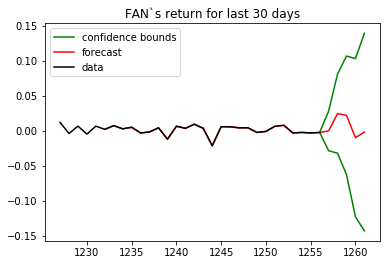

In [524]:

plt.plot(confidence_bound1.tail(6),'g',markevery=100, label='confidence bounds')
plt.plot(confidence_bound2.tail(6),'g',markevery=100)
plt.plot(stock_forecast.tail(30),'r', label='forecast')
plt.plot(Stock1_newq.tail(30),'k', label='data')
plt.title('FAN`s return for last 30 days')
plt.legend()
plt.savefig('forecast.jpg')

plt.show()




In [503]:
##Forecasting for ACB
h = 5
##Calculate variance of e
Stock2['wnn']=Stock2['Daily_return']-Stock2['Daily_return_lag']
var_stock2=Stock2['Daily_return'].var()
var_e=Stock2['wnn'].var()
T = len(Stock2['Daily_return'])
var_stock2=Stock2['Daily_return'].var()
eps=np.zeros(h).reshape(h,1)

for i in range(0,h):
    eps[i]=random.gauss(0, math.sqrt(var_stock2))


xforecast2 = np.zeros((T+h,1))  #define length of forecast vector (including observed data)

xforecast2[0:T,] = Stock2['Daily_return'].values.reshape(T,1) 
#set first T periods equal to observed data
bound1_2=np.zeros((T+h,1))
bound2_2=np.zeros((T+h,1))
bound1_2[0:T,]=Stock2['Daily_return'].values.reshape(T,1)
bound2_2[0:T,]=Stock2['Daily_return'].values.reshape(T,1)

for i,t in enumerate(range(T,T+h)):  # start forward iteration loop
    xforecast2[t,] = eps[i] + xforecast2[t-1,]
    bound1_2[t,]=xforecast2[t,]+1.96*(i+1)*math.sqrt(var_e)
    bound2_2[t,]=xforecast2[t,]-1.96*(i+1)*math.sqrt(var_e)

stock_forecast2=pd.DataFrame(xforecast2)

confidence_bound1_2=pd.DataFrame(bound1_2)
confidence_bound2_2=pd.DataFrame(bound2_2)

Stock2_new = np.zeros((T,1))  #define length of forecast vector (including observed data)

Stock2_new[0:T,] = Stock2['Daily_return'].values.reshape(T,1)
Stock2_newq=pd.DataFrame(Stock2_new)

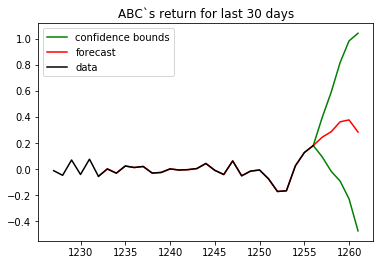

In [504]:
plt.plot(confidence_bound1_2.tail(6),'g',markevery=100, label='confidence bounds')
plt.plot(confidence_bound2_2.tail(6),'g',markevery=100)
plt.plot(stock_forecast2.tail(30),'r', label='forecast')
plt.plot(Stock2_newq.tail(30),'k', label='data')
plt.title('ABC`s return for last 30 days')
plt.legend()
plt.savefig('forecast_ABC.jpg')

plt.show()

In [ ]:
#5Calculate BIC
bic_ar=np.zeros(5)
for i in range(0,5):
    mod = ARMA(Stock1['Daily_return'], order=(i+1,0))
    result = mod.fit()
    bic_ar[i]=result.bic


In [ ]:
bic_ar2=np.zeros(5)
for i in range(0,5):
    mod2 = ARMA(Stock2['Daily_return'], order=(i+1,0))
    result2 = mod2.fit()
    bic_ar2[i]=result2.bic

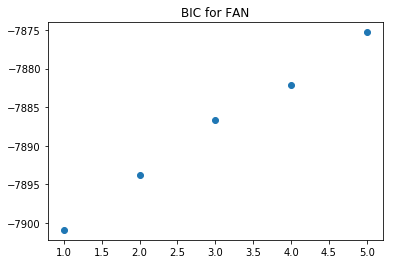

In [516]:

plt.scatter(np.array([1,2,3,4,5]),bic_ar)
plt.title('BIC for FAN')
plt.savefig('BIC for FAN.jpg')


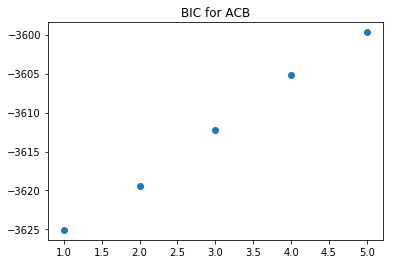

In [519]:

plt.scatter(np.array([1,2,3,4,5]),bic_ar2)
plt.title('BIC for ACB')
plt.savefig('BIC for ACB.jpg')
